# Assignment


# You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Fit a Decision Tree Regressor model on your data. 
3. I want to see the training and testing accuracy of your model. So do split your data before modelling.


### Brownie Points (Extra 15 points)
- Lastly, i want to see a function where i can input my values and get a prediction of whatever you are trying to predict. Think this through !!.



Best of luck !!

![](https://media.tenor.com/mUVjXo5LhsQAAAAC/kakashi-yes.gif)

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,ElasticNet, LogisticRegression


In [70]:
df = pd.read_csv('Salary Data.csv')

In [71]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


# EDA

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [37]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [38]:
newdf = df.fillna(0)

In [39]:
newdf.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [63]:
newdf.nunique()

Age                     32
Gender                   2
Education Level          3
Job Title              175
Years of Experience     28
Salary                  37
dtype: int64

In [64]:
newdf.drop(columns = ['Education Level', 'Job Title'], inplace = True)


In [65]:
test_data = df.tail(10)

In [66]:
newdf = newdf.head(363)


# whats the median salary
what % of people are earning more than the median salary
Avg. money that male make vs female
Avg

In [57]:
print("Minimum salary: "+ str(df['Salary'].min()))
print("Avg. Salary: "+str(df['Salary'].median()))
print("Maximum Salary: "+str(df['Salary'].max()))

Minimum salary: 350.0
Avg. Salary: 95000.0
Maximum Salary: 250000.0


In [59]:
Richer = len(df[df['Salary']>95000])
All = len(df)
rich_percentage = (Richer*100)/All

print("%.2f percentage of people in this dataset earn more than avg."%rich_percentage )

46.93 percentage of people in this dataset earn more than avg.


In [61]:
df_male = df[df['Gender']=='Male']
df_female = df[df['Gender']=='Female']

print("Avg. Salary of male: "+ str(df_male['Salary'].median()))
print("Avg. Salary of female: "+str(df_female['Salary'].median()))

Avg. Salary of male: 97500.0
Avg. Salary of female: 90000.0


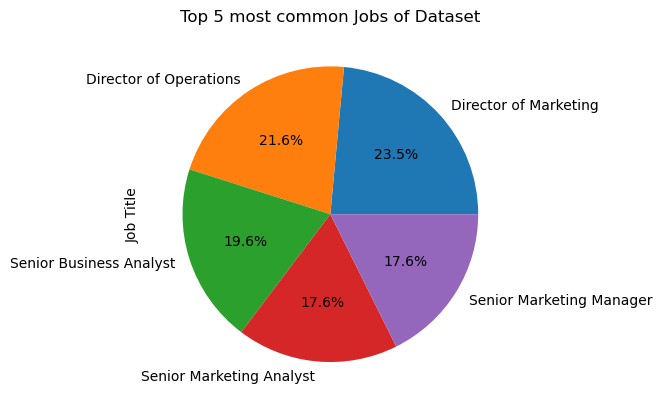

In [62]:
df['Education Level'].value_counts()

pie_data = df["Job Title"].value_counts().head(5)
pie_data.plot(kind="pie",autopct='%1.1f%%')
plt.title("Top 5 most common Jobs of Dataset")
plt.show()

# NO. IS Direct Marketing with 23.5 followed by Director of operations.

# Let's Look on the Data of Salary according to gender

<Axes: xlabel='Gender', ylabel='Salary'>

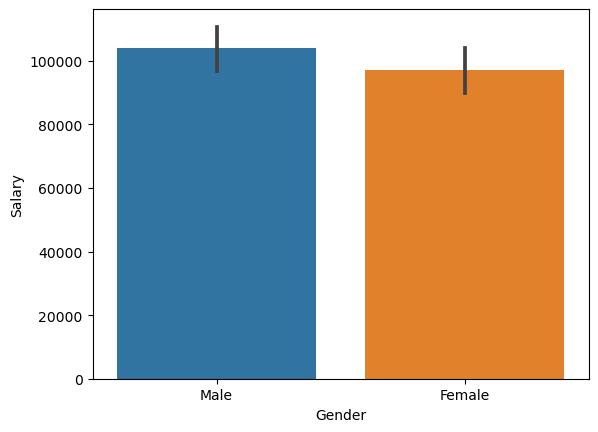

In [74]:
sns.barplot(x = 'Gender', y = 'Salary', data = df)

# Salary with the experience

<Axes: xlabel='Years of Experience', ylabel='Salary'>

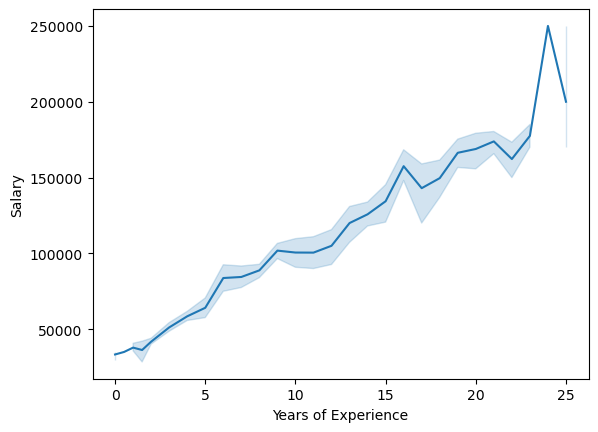

In [77]:
sns.lineplot(x = 'Years of Experience', y = 'Salary', data = df)


<Axes: >

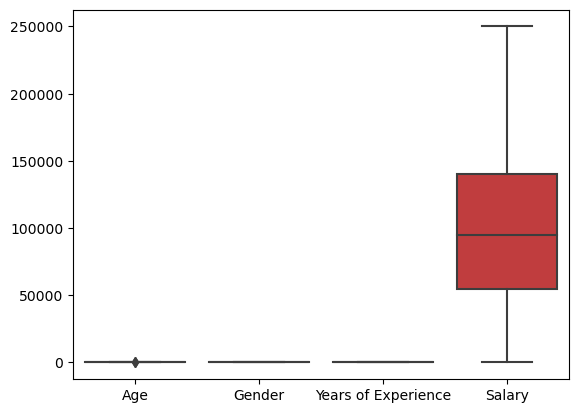

In [79]:
sns.boxplot(newdf)

<Axes: ylabel='Gender'>

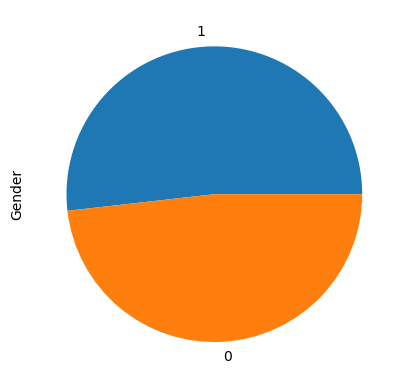

In [81]:
newdf['Gender'].value_counts().plot(kind='pie')

# Education Level 

<Axes: ylabel='Education Level'>

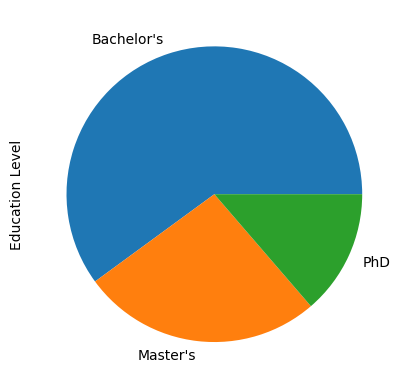

In [84]:
df['Education Level'].value_counts().plot(kind='pie')

# Bachelor's are more as compared with phD and Master's

# EDA ENDS

In [41]:
newdf["Gender"] = newdf["Gender"].replace({"Male":1, "Female":0})

In [42]:
newdf["Education Level"] = newdf["Education Level"].replace({"Bachelor's": 1, "Master's":0,"PhD":2})

In [43]:
X = newdf[["Age", "Gender", "Education Level", "Years of Experience"]]

In [44]:
y = newdf["Salary"]

In [45]:
X.head()

,Age,Gender,Education Level,Years of Experience
0,32.0,1,1,5.0
1,28.0,0,0,3.0
2,45.0,1,2,15.0
3,36.0,0,1,7.0
4,52.0,1,0,20.0


In [46]:
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(262, 4)
(113, 4)
(262,)
(113,)


In [48]:
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_pred, y_test)
print(accuracy)

0.8846406509363218


In [50]:
lg = LogisticRegression().fit(X, y)
y_new = lg.predict(X_test)
print(y_new)

[120000.  95000.  90000.  40000.  60000. 120000. 160000.  40000.  50000.
  95000.  40000.  40000. 130000. 130000. 180000. 170000.  90000.  50000.
  95000. 130000. 120000.  95000.  40000. 150000.  90000. 170000.  60000.
 150000. 160000.  90000. 160000. 120000. 160000. 170000. 150000.  95000.
  40000.  50000.  40000.  50000.  50000.  40000. 120000.  90000.  40000.
 180000.  50000.  90000. 160000. 160000.  40000.  95000.  40000. 160000.
 120000.  50000.  60000. 120000. 120000.  95000.  50000. 120000.  40000.
  40000. 180000.  50000.  95000.  35000.  95000. 170000.  40000. 170000.
 170000.  50000.  60000.  95000.  50000.  40000.  95000. 140000. 180000.
  50000.  95000.  40000. 120000. 130000. 120000.  95000. 150000. 150000.
  40000. 130000.  95000. 120000. 120000. 170000. 150000. 180000. 120000.
  50000. 120000. 120000.  90000. 150000. 170000.  95000.  40000. 150000.
  90000.  40000. 170000.  40000.  50000.]


/Users/ajaykaswan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
print(r2_score(y_new, y_test))

0.8746749879106015


In [19]:
el = ElasticNet().fit(X, y)
y_pre = el.predict(X_test)
print(y_pre)

[111808.45898926  45670.88103217  55863.53501898  52341.2106187
 139699.569346    66877.31408375 141460.73154614 174153.95765759
  46866.32532418  69204.19419202 171005.95247135 100794.67992449
 166946.60560022 127850.31748463 100794.67992449  62533.8646055
  85127.14064317  98198.04492775  85127.14064317  30569.05965899
  43344.0009239  100780.33220585  67443.03199188 164335.62288483
  45670.88103217  94110.00261933 123118.20107369  64295.02680564
  64295.02680564  95319.79462998 113569.6211894   52892.58080819
  56684.66009694 133029.23975948  85692.85855131 160276.2760137
  53536.6549107   69204.19419202  68638.47628389  87454.02075145
  34912.50913723  82544.85336507  89215.18295159  45105.16312404
 111808.45898926  77247.019046    95885.51253811  42134.20891325
 176855.15697991  49193.20543246  45670.88103217  92363.18813783
  79573.89915428 154157.31661667 139699.569346    90602.02593769
  84306.01556521 186391.87645165  60772.70240536  86888.30284331
  80783.69116493 150634.9922

In [20]:
print(r2_score(y_pre, y_test))

0.8558511153369723


In [21]:
from sklearn import tree

In [22]:
clf = tree.DecisionTreeRegressor(min_samples_split=50)

In [23]:
clf = clf.fit(X, y)

In [24]:
clf

DecisionTreeRegressor(min_samples_split=50)

[Text(0.65, 0.9166666666666666, 'x[0] <= 40.5\nsquared_error = 2362145317.796\nsamples = 375\nvalue = 100040.933'),
 Text(0.4, 0.75, 'x[3] <= 5.5\nsquared_error = 806083949.686\nsamples = 243\nvalue = 71009.671'),
 Text(0.2, 0.5833333333333334, 'x[3] <= 2.5\nsquared_error = 200648915.659\nsamples = 123\nvalue = 48173.577'),
 Text(0.1, 0.4166666666666667, 'x[0] <= 11.5\nsquared_error = 109953997.927\nsamples = 56\nvalue = 38041.964'),
 Text(0.05, 0.25, 'squared_error = 0.0\nsamples = 2\nvalue = 0.0'),
 Text(0.15, 0.25, 'x[2] <= 0.5\nsquared_error = 58441526.92\nsamples = 54\nvalue = 39450.926'),
 Text(0.1, 0.08333333333333333, 'squared_error = 74000000.0\nsamples = 5\nvalue = 49000.0'),
 Text(0.2, 0.08333333333333333, 'squared_error = 46599908.372\nsamples = 49\nvalue = 38476.531'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 31.5\nsquared_error = 118946313.21\nsamples = 67\nvalue = 56641.791'),
 Text(0.25, 0.25, 'squared_error = 77025623.269\nsamples = 38\nvalue = 51973.684'),
 Text(0.35, 

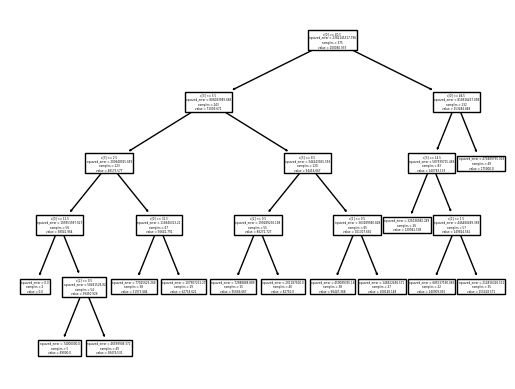

In [25]:
tree.plot_tree(clf)